<a href="https://colab.research.google.com/github/parinazeini/6220_INSE/blob/main/final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [ ]:
!pip install pyspc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyspc: filename=pyspc-0.4-py3-none-any.whl size=30875 sha256=cccd5ba7d296759eaa9717c7e57b5a3ca7f8c33c39fdd8dc6419b9e228f9a504
  Stored in directory: /root/.cache/pip/wheels/52/0d/5a/91430bb172f33fef7eeb798a1ca254ad4f006ea664dc8623f6
Successfully built pyspc


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving schiller -01.csv to schiller -01.csv


In [ ]:
df = pd.read_csv('schiller -01.csv')

In [ ]:
df

rgb_cervix_r_mean  rgb_cervix_r_std  rgb_cervix_r_mean_minus_std  \
0           72.560895         19.990110                    52.570784   
1           46.969042         25.381677                    21.587365   
2           42.371042         17.401837                    24.969206   
3           63.525569         23.715461                    39.810108   
4           89.798432         16.849075                    72.949356   
..                ...               ...                          ...   
87          73.465862         33.856824                    39.609038   
88          36.279936         23.325050                    12.954885   
89          74.766472         33.667006                    41.099466   
90          87.554770         18.588586                    68.966184   
91          37.259466         29.718387                     7.541079   

    rgb_cervix_r_mean_plus_std  rgb_cervix_g_mean  rgb_cervix_g_std  \
0                    92.551005          56.272375         17.064523   
1                    72.350719          35.246707         18.211488   
2                    59.772879          30.377710         13.217752   
3                    87.241030          47.450544         19.834744   
4                   106.647507          66.168468         13.784246   
..                         ...                ...               ...   
87                  107.322686          44.657984         35.514453   
88                   59.604986          31.549222         23.099706   
89                  108.433478          44.113166         29.555688   
90                  106.143356          52.509842         15.476167   
91                   66.977852          39.275293         27.840955   

    rgb_cervix_g_mean_minus_std  class  
0                     39.207852      1  
1                     17.035219      1  
2                     17.159958      1  
3                     27.615800      1  
4                     52.384222      1  
..                          ...    ...  
87                     9.143531      0  
88                     8.449515      1  
89                    14.557478      1  
90                    37.033676      0  
91                    11.434338      0  

[92 rows x 8 columns]

In [ ]:
len(df.index)

92

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rgb_cervix_r_mean            92 non-null     float64
 1   rgb_cervix_r_std             92 non-null     float64
 2   rgb_cervix_r_mean_minus_std  92 non-null     float64
 3   rgb_cervix_r_mean_plus_std   92 non-null     float64
 4   rgb_cervix_g_mean            92 non-null     float64
 5   rgb_cervix_g_std             92 non-null     float64
 6   rgb_cervix_g_mean_minus_std  92 non-null     float64
 7   class                        92 non-null     int64  
dtypes: float64(7), int64(1)
memory usage: 5.9 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  2


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

sns.pairplot is a function in the seaborn library in Python that is used to plot pairwise relationships between multiple variables in a dataset. The resulting plot is a grid of scatterplots, with each variable plotted against every other variable.

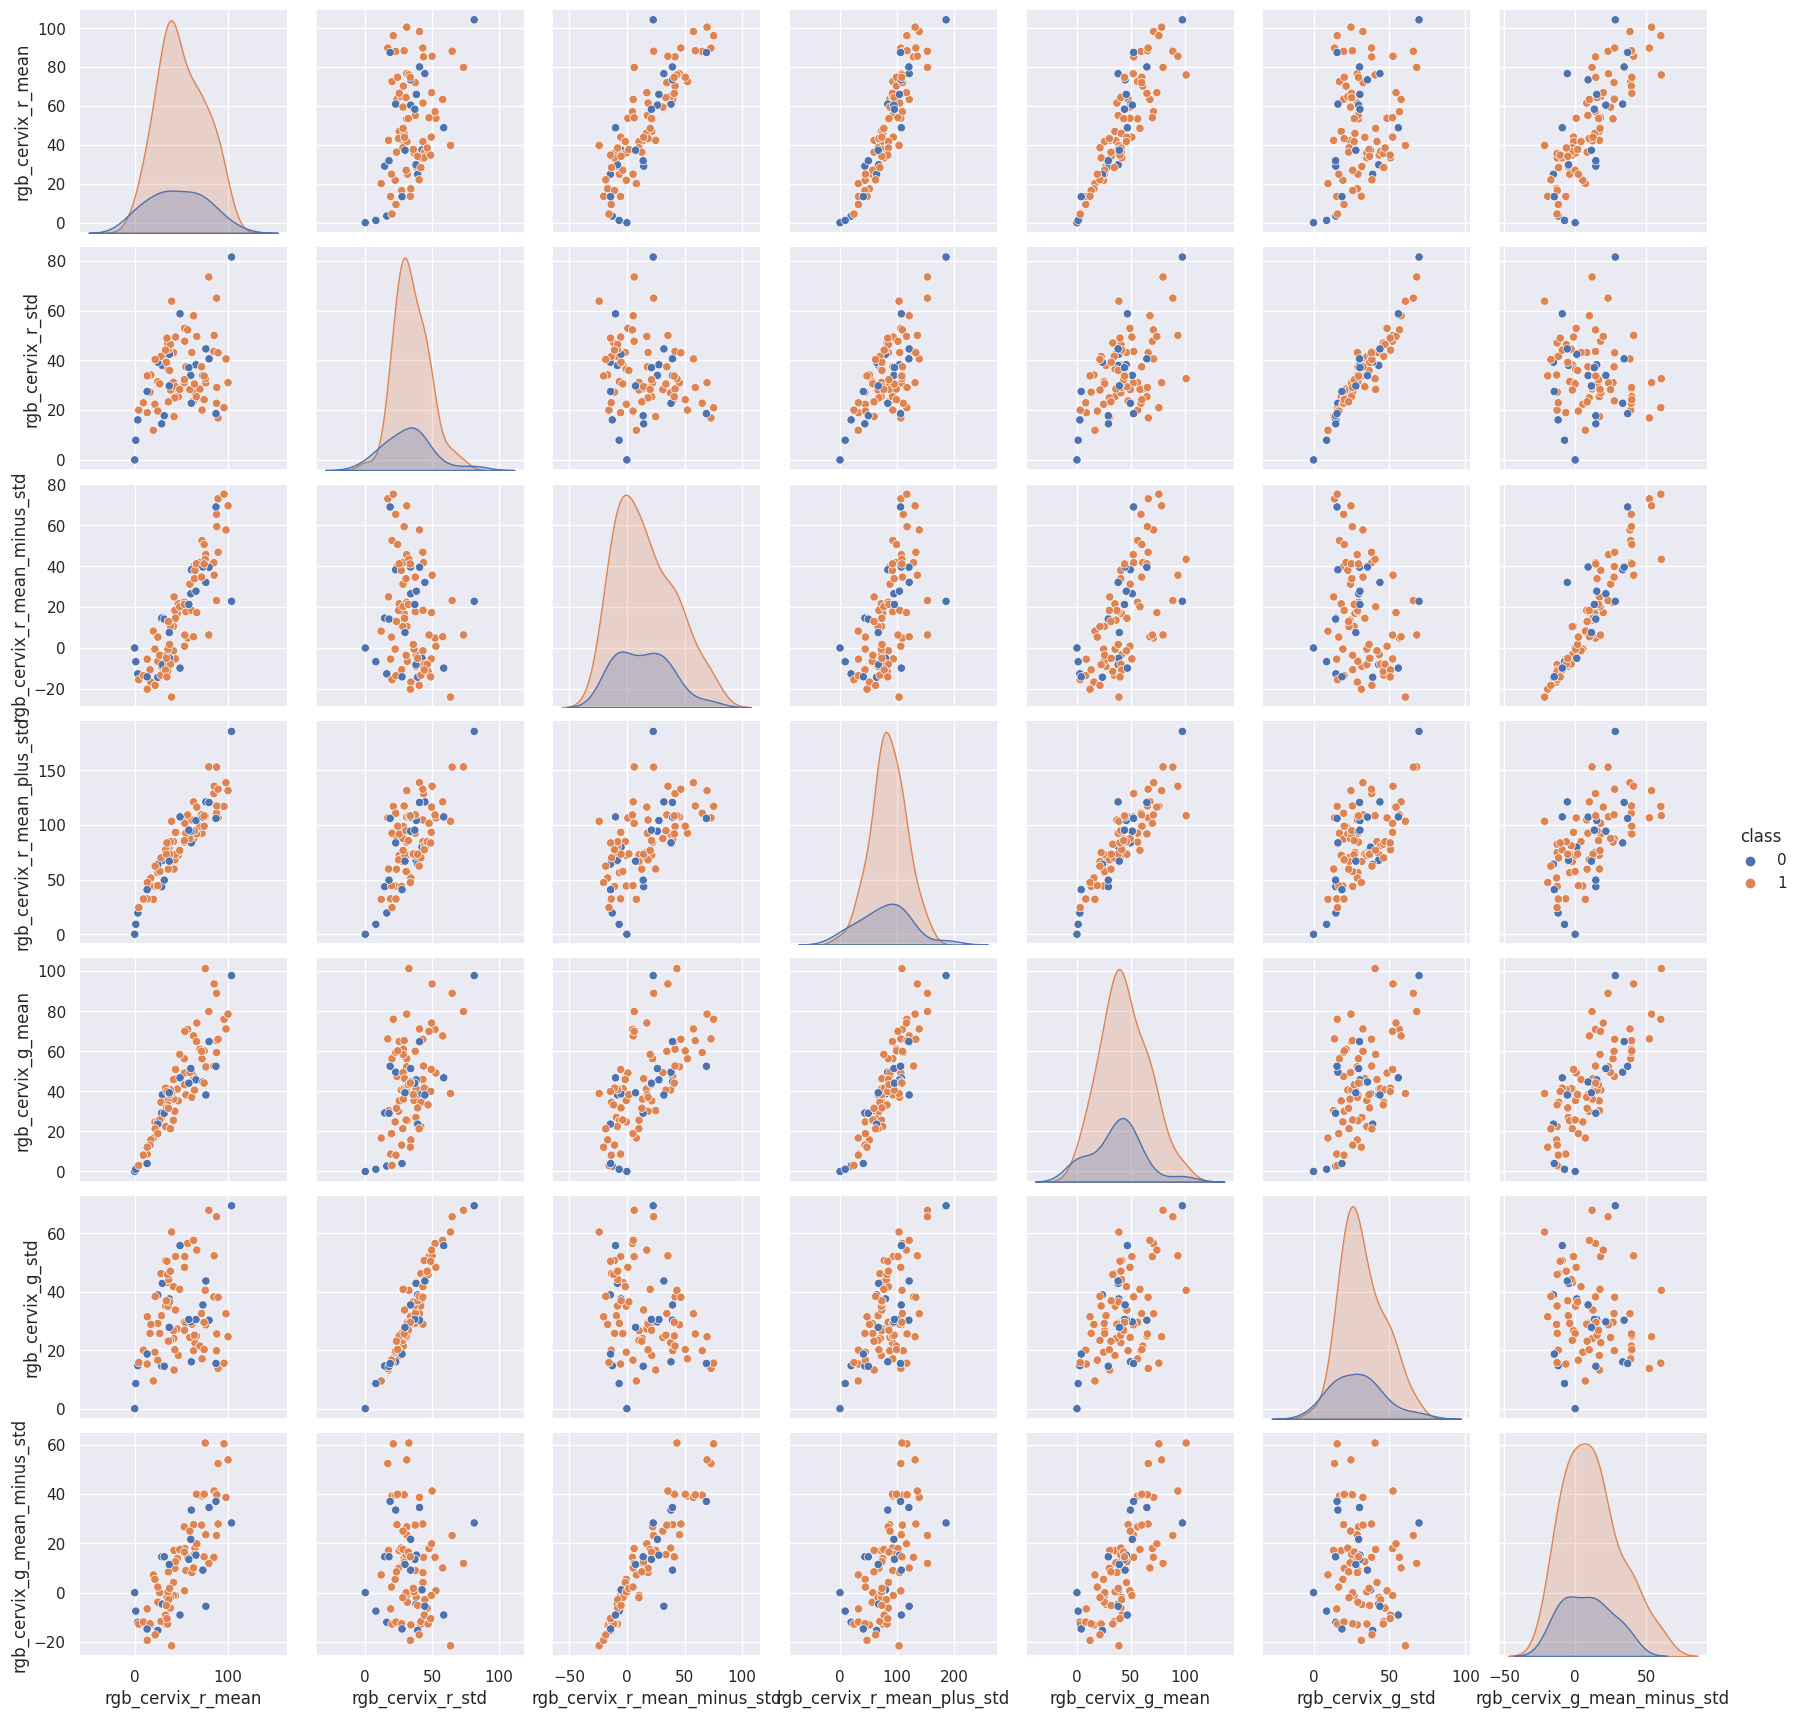

In [ ]:
sns.pairplot(df, hue='class')
plt.show()

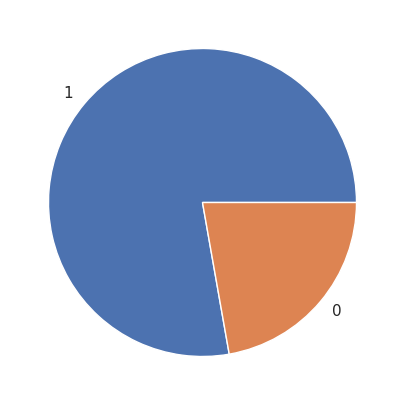

In [ ]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['class'])
X.head(10)

rgb_cervix_r_mean  rgb_cervix_r_std  rgb_cervix_r_mean_minus_std  \
0          72.560895         19.990110                    52.570784   
1          46.969042         25.381677                    21.587365   
2          42.371042         17.401837                    24.969206   
3          63.525569         23.715461                    39.810108   
4          89.798432         16.849075                    72.949356   
5          98.285912         40.558468                    57.727444   
6          20.126311         11.891634                     8.234676   
7          53.384621         31.016710                    22.367911   
8          96.173776         20.967873                    75.205903   
9          60.995500         22.743766                    38.251734   

   rgb_cervix_r_mean_plus_std  rgb_cervix_g_mean  rgb_cervix_g_std  \
0                   92.551005          56.272375         17.064523   
1                   72.350719          35.246707         18.211488   
2                   59.772879          30.377710         13.217752   
3                   87.241030          47.450544         19.834744   
4                  106.647507          66.168468         13.784246   
5                  138.844380          71.148431         32.500509   
6                   32.017945          16.687959          9.480817   
7                   84.401332          56.298417         29.586263   
8                  117.141650          75.974056         15.571877   
9                   83.739265          49.565436         16.041129   

   rgb_cervix_g_mean_minus_std  
0                    39.207852  
1                    17.035219  
2                    17.159958  
3                    27.615800  
4                    52.384222  
5                    38.647922  
6                     7.207142  
7                    26.712154  
8                    60.402179  
9                    33.524307

In [ ]:
X.describe().transpose()

count       mean        std        min  \
rgb_cervix_r_mean             90.0  49.469060  26.066457   0.000000   
rgb_cervix_r_std              90.0  34.018267  14.182505   0.000000   
rgb_cervix_r_mean_minus_std   90.0  15.450792  24.693735 -24.017678   
rgb_cervix_r_mean_plus_std    90.0  83.487327  33.932679   0.000000   
rgb_cervix_g_mean             90.0  42.629840  22.416689   0.000000   
rgb_cervix_g_std              90.0  31.608141  14.789820   0.000000   
rgb_cervix_g_mean_minus_std   90.0  11.021699  19.266450 -21.587384   

                                   25%        50%         75%         max  
rgb_cervix_r_mean            32.235030  44.975200   69.410959  104.327203  
rgb_cervix_r_std             25.031986  32.417967   42.228291   81.499913  
rgb_cervix_r_mean_minus_std  -5.440818  13.272431   34.448261   75.205903  
rgb_cervix_r_mean_plus_std   66.655018  84.070299  106.619759  185.827116  
rgb_cervix_g_mean            29.093339  40.982239   56.291906  101.281284  
rgb_cervix_g_std             20.178891  29.404332   40.793158   69.472193  
rgb_cervix_g_mean_minus_std  -4.460701   9.959194   22.807985   60.762007

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

rgb_cervix_r_mean  rgb_cervix_r_std  rgb_cervix_r_mean_minus_std  \
0           0.890846         -0.994658                     1.511636   
1          -0.096447         -0.612372                     0.249899   
2          -0.273830         -1.178178                     0.387618   
3           0.542278         -0.730514                     0.991984   
4           1.555843         -1.217372                     2.341512   
5           1.883276          0.463729                     1.721631   
6          -1.131996         -1.568876                    -0.293862   
7           0.151056         -0.212824                     0.281686   
8           1.801793         -0.925331                     2.433406   
9           0.444672         -0.799412                     0.928522   

   rgb_cervix_r_mean_plus_std  rgb_cervix_g_mean  rgb_cervix_g_std  \
0                    0.268604           0.611998         -0.988862   
1                   -0.330036          -0.331204         -0.910877   
2                   -0.702783          -0.549625         -1.250415   
3                    0.111242           0.216255         -0.800507   
4                    0.686357           1.055932         -1.211898   
5                    1.640518           1.279331          0.060675   
6                   -1.525306          -1.163741         -1.504500   
7                    0.027087           0.613166         -0.137473   
8                    0.997353           1.495806         -1.090352   
9                    0.007466           0.311128         -1.058446   

   rgb_cervix_g_mean_minus_std  
0                     1.471162  
1                     0.313873  
2                     0.320383  
3                     0.866120  
4                     2.158895  
5                     1.441936  
6                    -0.199099  
7                     0.818955  
8                     2.577388  
9                     1.174512

In [ ]:
X.describe().transpose()

count          mean       std       min  \
rgb_cervix_r_mean             90.0  2.701543e-16  1.005602 -1.908437   
rgb_cervix_r_std              90.0 -1.708510e-16  1.005602 -2.412045   
rgb_cervix_r_mean_minus_std   90.0  6.784696e-18  1.005602 -1.607273   
rgb_cervix_r_mean_plus_std    90.0  2.115592e-16  1.005602 -2.474165   
rgb_cervix_g_mean             90.0 -4.746203e-16  1.005602 -1.912355   
rgb_cervix_g_std              90.0  5.119362e-17  1.005602 -2.149128   
rgb_cervix_g_mean_minus_std   90.0  1.133353e-17  1.005602 -1.702014   

                                  25%       50%       75%       max  
rgb_cervix_r_mean           -0.664861 -0.173366  0.769327  2.116340  
rgb_cervix_r_std            -0.637167 -0.113468  0.582127  3.366658  
rgb_cervix_r_mean_minus_std -0.850768 -0.088709  0.773633  2.433406  
rgb_cervix_r_mean_plus_std  -0.498829  0.017276  0.685535  3.032862  
rgb_cervix_g_mean           -0.607241 -0.073911  0.612874  2.631077  
rgb_cervix_g_std            -0.777108 -0.149843  0.624516  2.574485  
rgb_cervix_g_mean_minus_std -0.808096 -0.055457  0.615179  2.596169

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

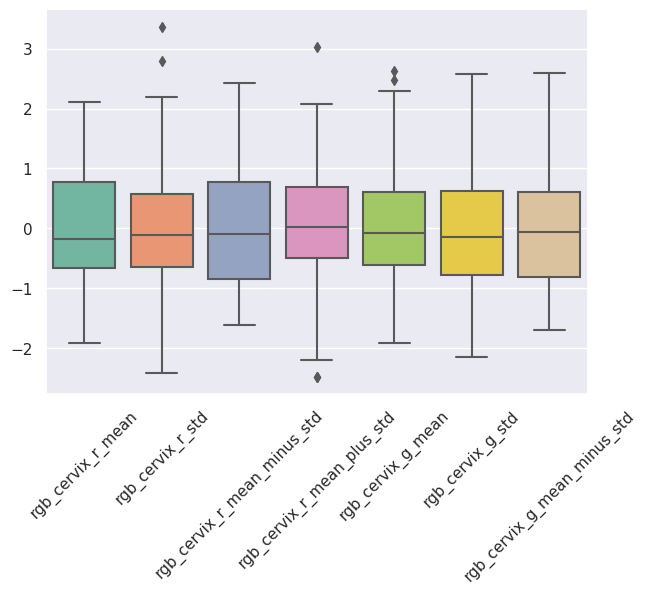

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


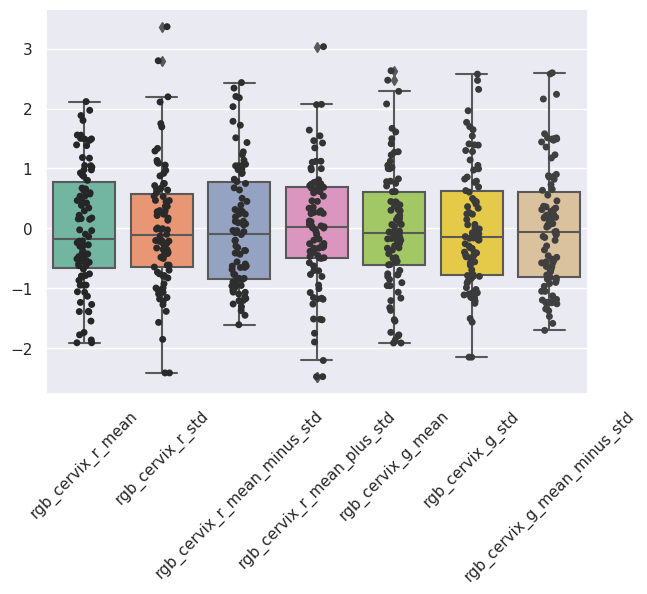

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

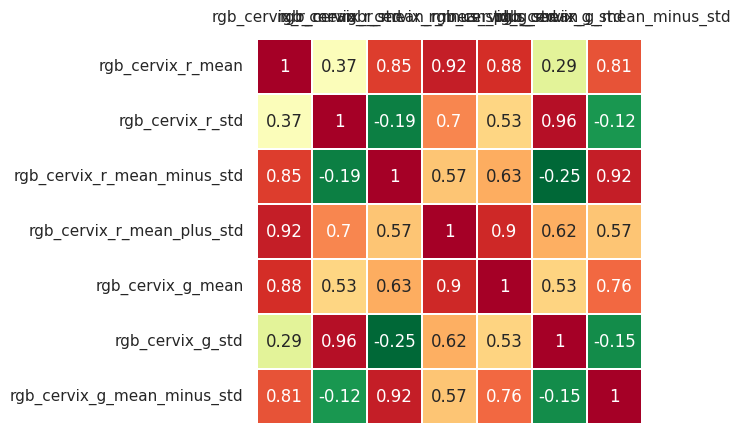

In [ ]:
fig1,ax1 = plt.subplots()
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

**Principal Component Analysis (PCA)**

Text(0, 0.5, 'Z2')

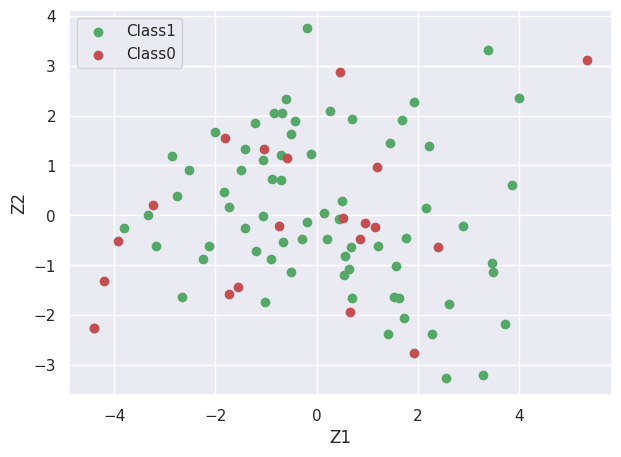

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)


idx_Class1= np.where(y == 1)
idx_Class0 = np.where(y == 0)


plt. figure()
plt.scatter(Z[idx_Class1,0], Z[idx_Class1,1], c='g', label='Class1')
plt.scatter(Z[idx_Class0,0], Z[idx_Class0,1], c='r', label='Class0')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')


**Eigenvectors**

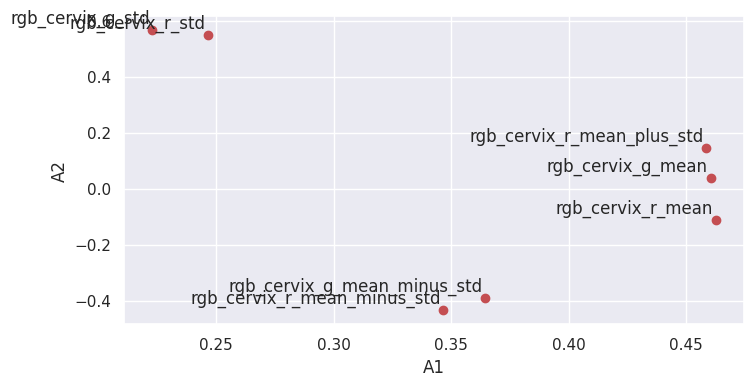

In [ ]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  self._transforms = np.empty((0, 3, 3))


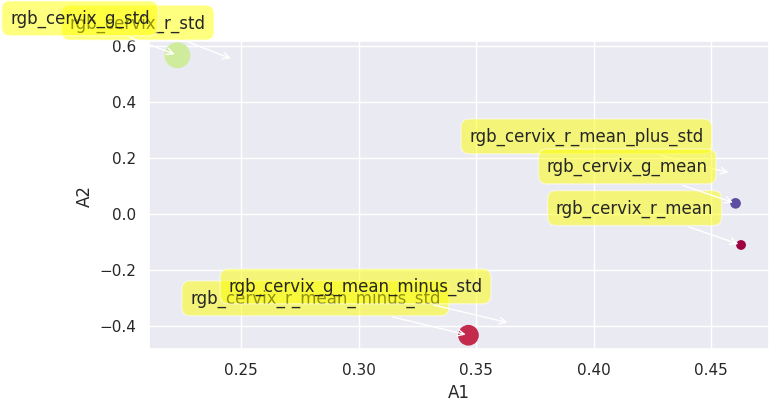

In [ ]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([4.44109004e+00, 2.38939287e+00, 2.08284388e-01, 3.98843917e-02,
       1.32232344e-19, 3.66876370e-20, 1.25873648e-20])

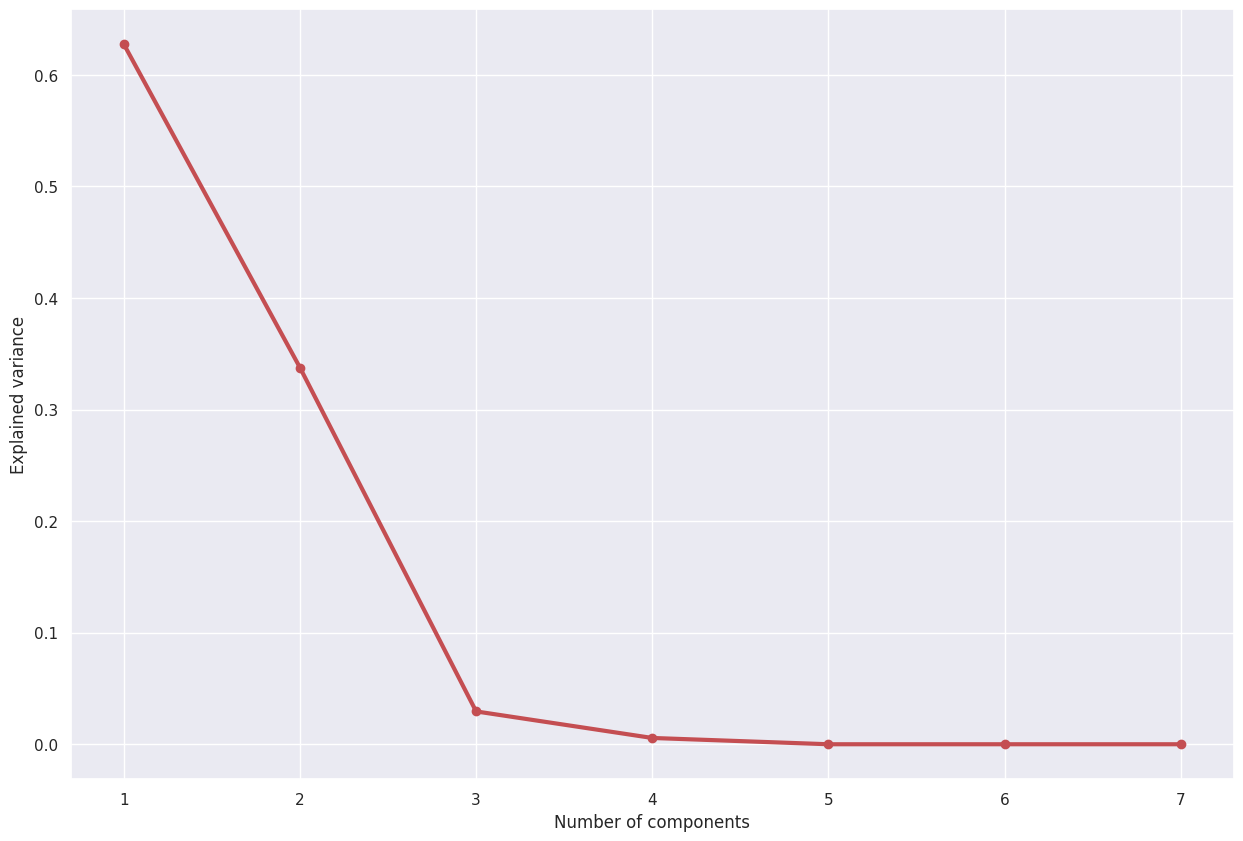

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

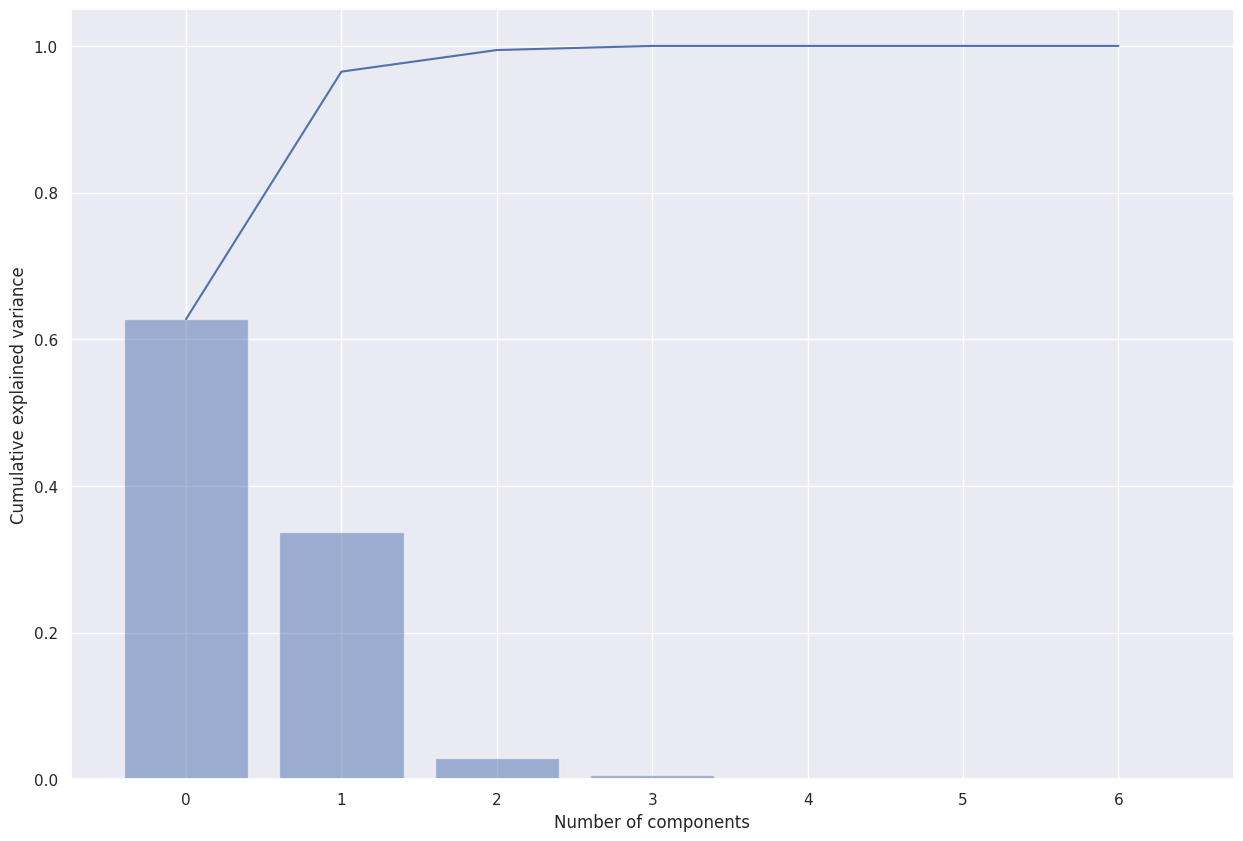

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([-2.37816011e+00, -1.13307122e+00, -1.74107135e+00, -1.66183434e+00,
       -3.25449693e+00, -9.49613912e-01, -1.64583530e+00, -6.28331672e-01,
       -3.19512320e+00, -1.93945213e+00, -1.01866671e+00,  1.93988041e+00,
       -1.20045824e+00,  2.08350392e+00, -4.68529875e-01, -5.30795643e-01,
       -2.25950785e+00,  1.51770628e-01, -1.08183228e+00, -6.08512228e-01,
        9.08836228e-01, -6.05108756e-01, -1.65320765e+00, -2.25950785e+00,
       -5.13083611e-03,  4.60747765e-01,  9.15704069e-01, -5.23792573e-01,
        4.92693044e-02,  1.33139347e+00, -1.31322955e+00,  2.89235952e-01,
        1.91519697e+00, -1.13249917e+00, -1.57818069e+00,  1.58222852e-01,
       -2.46062952e-01,  4.93645602e-04, -2.53242611e-01, -8.83546000e-01,
        3.30933516e+00, -2.17318029e+00,  3.79153362e-01,  2.27307497e+00,
        1.21620082e+00,  1.33666497e+00,  1.54291005e+00,  2.34332398e+00,
       -1.25396142e-01,  1.23061319e+00,  1.15220100e+00,  3.11896555e+00,
        7.29694856e-01,  

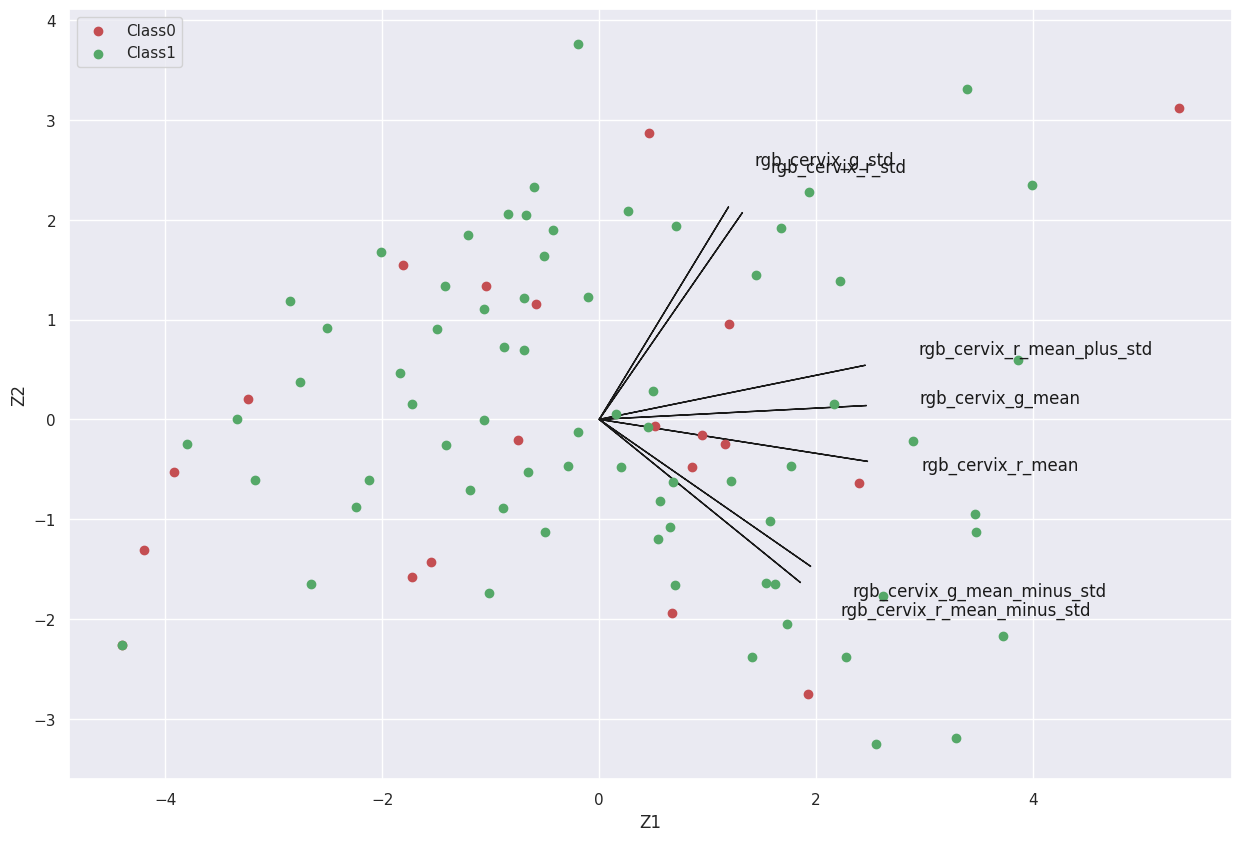

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Class0,0], Z[idx_Class0,1], c='r', label='Class0')
plt.scatter(Z[idx_Class1,0], Z[idx_Class1,1], c='g', label='Class1')

plt.legend(loc='upper left')
Z1
Z2

##**Using PCA Library**

In [ ]:
!pip3 install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2
0   1.411720 -2.378160
1  -0.501499 -1.133071
2  -1.020227 -1.741071
3   0.702500 -1.661834
4   2.549146 -3.254497
..       ...       ...
85  1.155892 -0.243296
86 -1.189034 -0.711592
87  1.213390 -0.618742
88  1.927913 -2.752421
89 -0.747733 -0.204742

[90 rows x 2 columns]

**Scatter plot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.43%] of the variance'}, xlabel='PC1 (62.7% expl.var)', ylabel='PC2 (33.7% expl.var)'>)

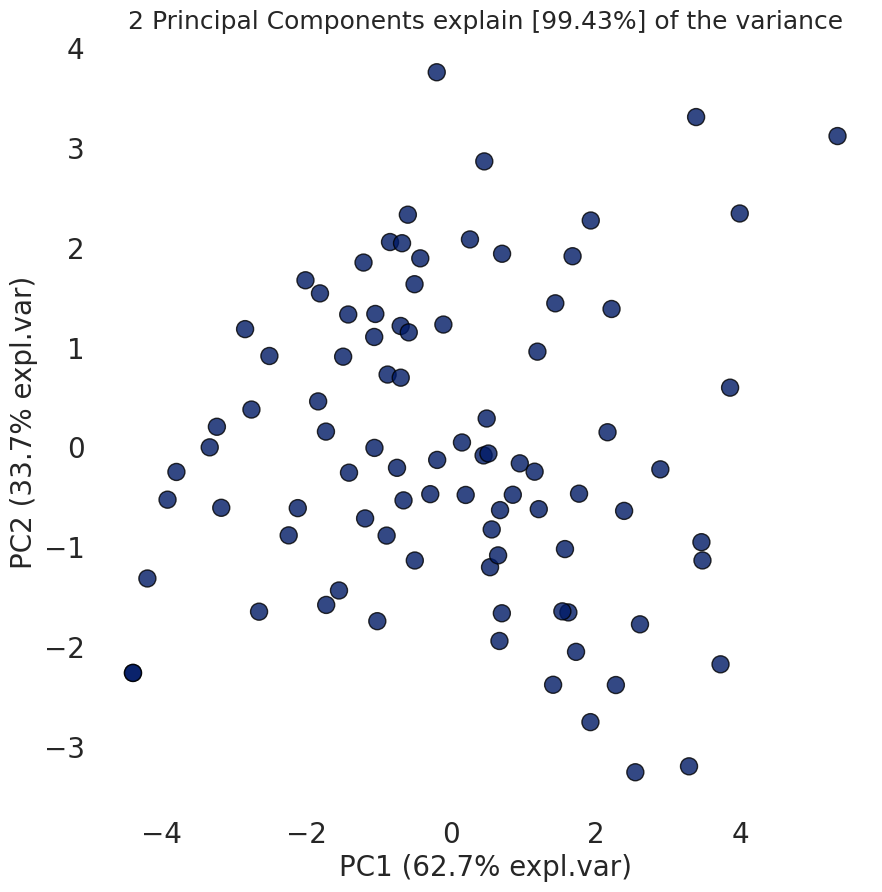

In [ ]:
model.scatter(figsize = (10,10),label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T
A

PC1       PC2
rgb_cervix_r_mean            0.462707 -0.111884
rgb_cervix_r_std             0.246746  0.550610
rgb_cervix_r_mean_minus_std  0.346714 -0.434339
rgb_cervix_r_mean_plus_std   0.458573  0.144186
rgb_cervix_g_mean            0.460373  0.036876
rgb_cervix_g_std             0.222880  0.565895
rgb_cervix_g_mean_minus_std  0.364555 -0.391502

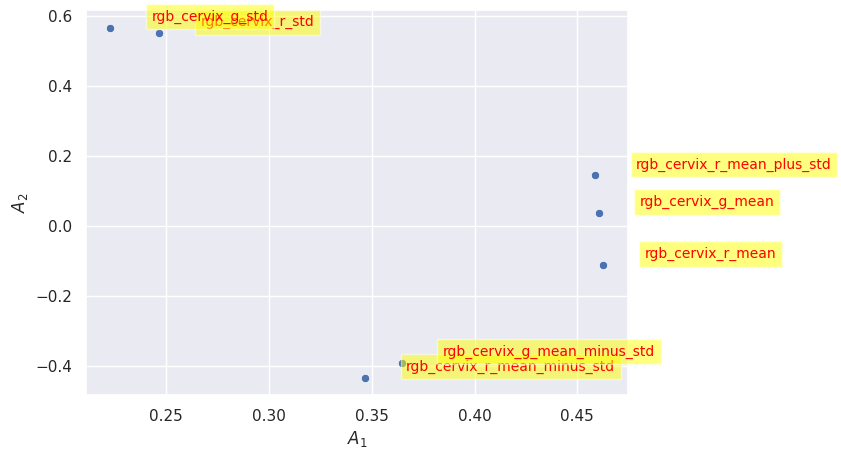

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

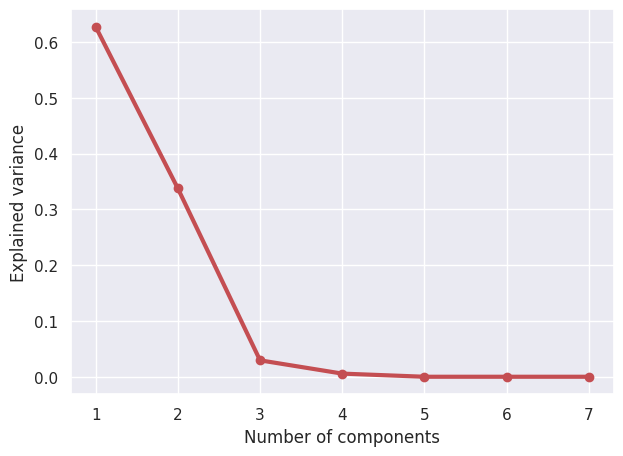

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

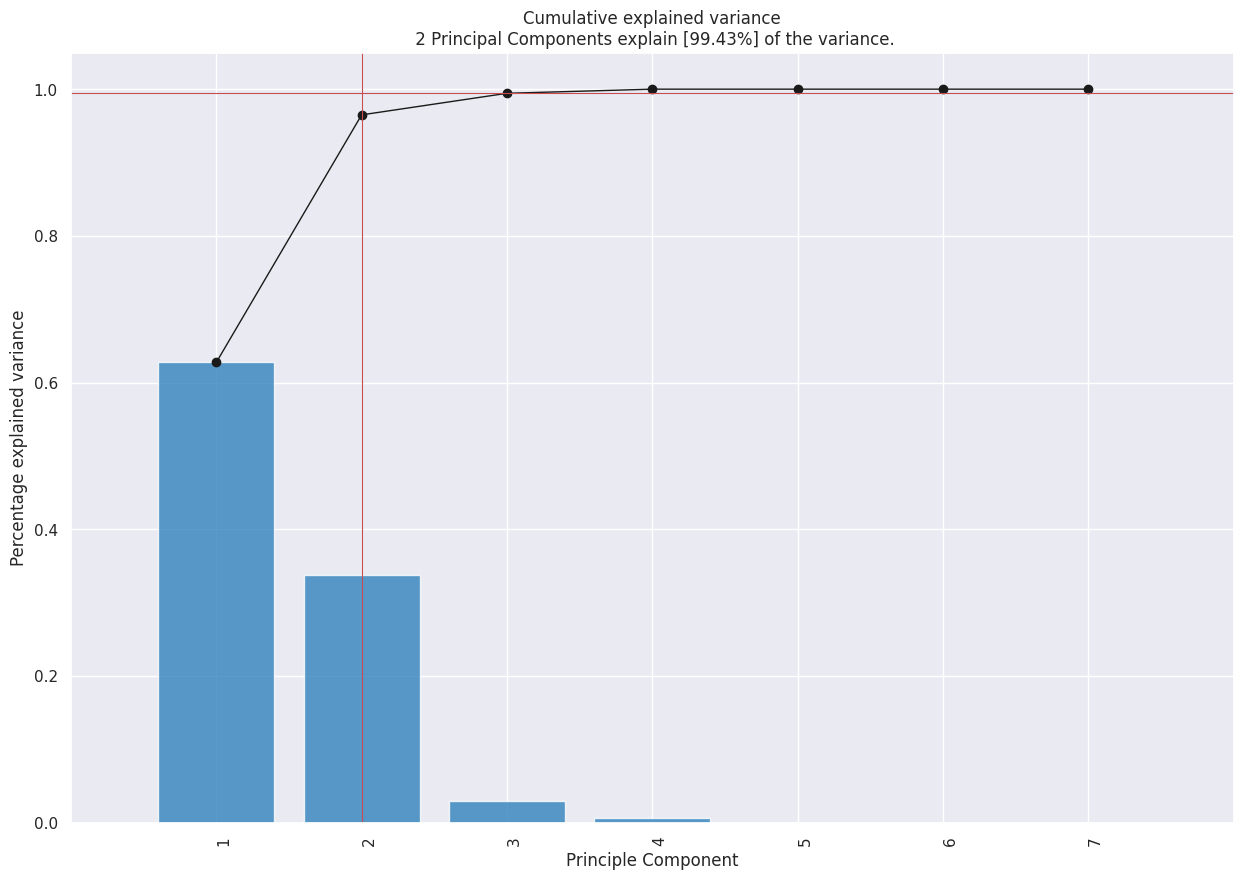

<Figure size 700x500 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

A biplot is a graphical representation of multivariate data that displays both observations and variables simultaneously in a single plot. Each observation is represented as a point in a two-dimensional plot, while the variables are represented as arrows or vectors that point in the direction of the greatest variation in the data. The length of the vector indicates the magnitude of the variable, while the angle between two vectors reflects their correlation.

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


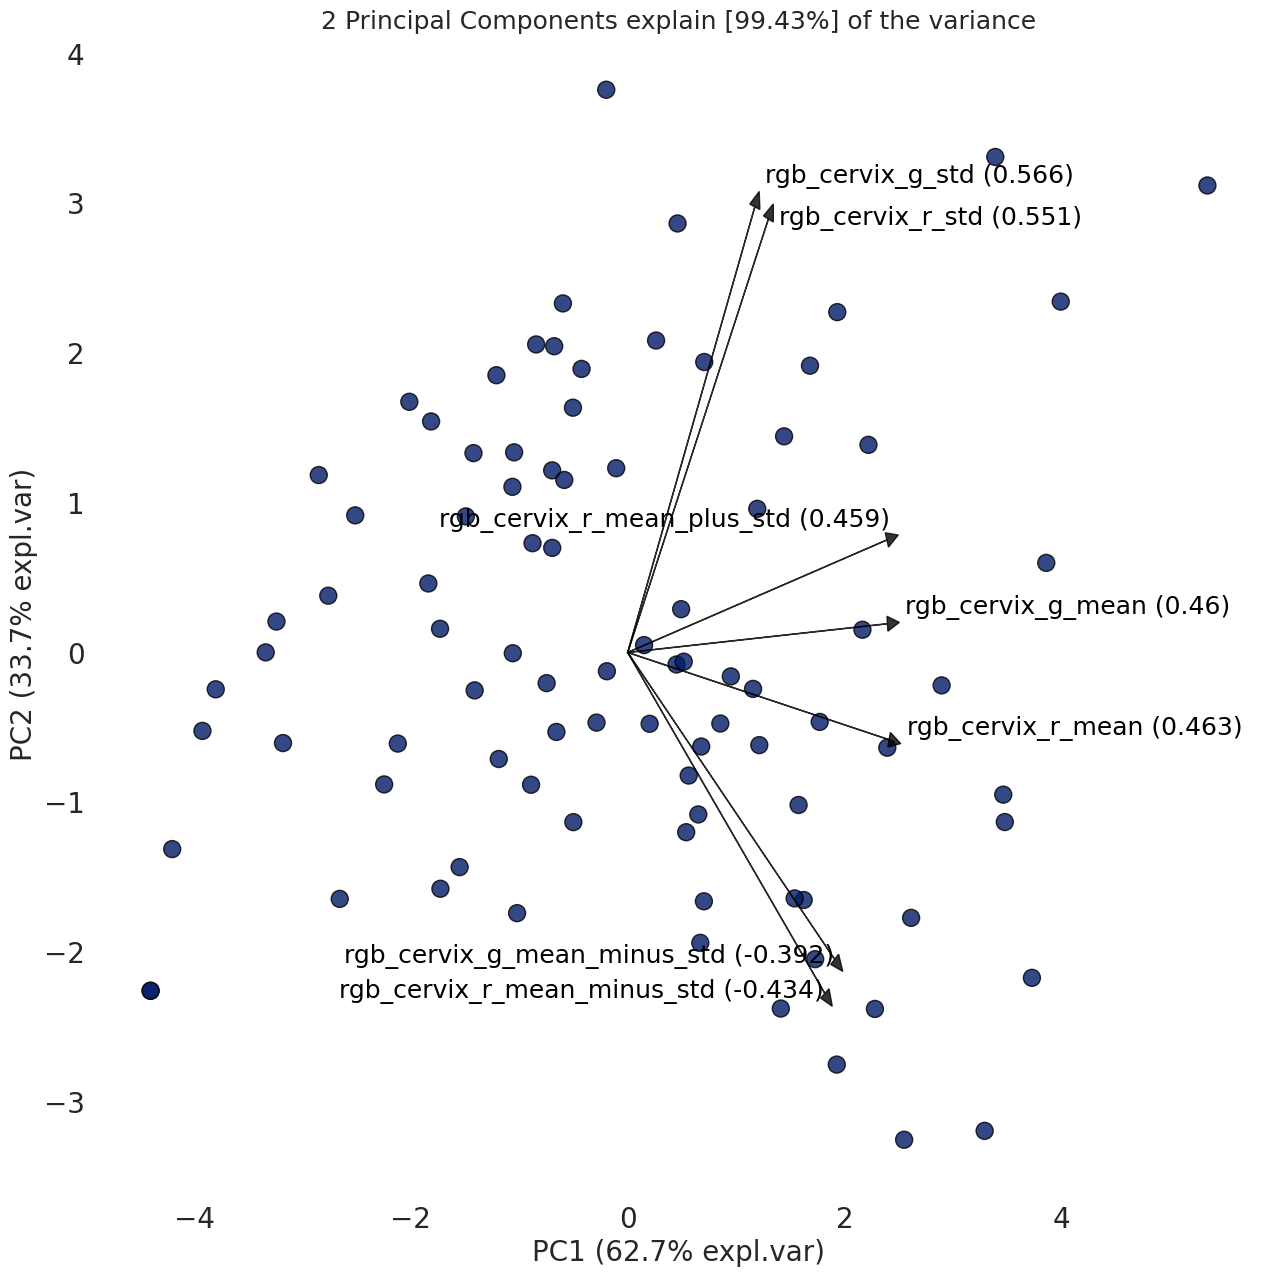

(<Figure size 1500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.43%] of the variance'}, xlabel='PC1 (62.7% expl.var)', ylabel='PC2 (33.7% expl.var)'>)

In [ ]:
model.biplot(figsize=(15,15),label=False, legend=False)

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook. The enable_colab() function in PyCaret is used to install and configure all the necessary dependencies to use PyCaret in Google Colab.

In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


**Data Splitting**

In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (81, 8)
Unseen Data For Predictions: (9, 8)


**Setting up the Environment in PyCaret**

The **setup()** function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data           (81, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set           (56, 7)
12                    Transformed Test Set           (25, 7)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              cb9c
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing all Machine Learning Models**

In [ ]:
#show the best model and their statistics
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.7867  0.2700   1.000  0.7867   
ridge                    Ridge Classifier    0.7867  0.0000   1.000  0.7867   
lda          Linear Discriminant Analysis    0.7867  0.2700   1.000  0.7867   
lightgbm  Light Gradient Boosting Machine    0.7867  0.4325   1.000  0.7867   
dummy                    Dummy Classifier    0.7867  0.5000   1.000  0.7867   
knn                K Neighbors Classifier    0.7467  0.5325   0.900  0.7933   
xgboost         Extreme Gradient Boosting    0.7467  0.5750   0.890  0.8117   
rf               Random Forest Classifier    0.7300  0.5312   0.910  0.7867   
et                 Extra Trees Classifier    0.7133  0.5200   0.890  0.7850   
ada                  Ada Boost Classifier    0.6900  0.6575   0.840  0.7900   
nb                            Naive Bayes    0.6767  0.3375   0.830  0.7483   
dt               Decision Tree Classifier    0.6700  0.5475   0.795  0.8050   
qda       Quadratic Discriminant Analysis    0.6567  0.3975   0.795  0.7733   
gbc          Gradient Boosting Classifier    0.6567  0.5675   0.800  0.7850   
svm                   SVM - Linear Kernel    0.4400  0.0000   0.340  0.4417   

              F1   Kappa     MCC  TT (Sec)  
lr        0.8792  0.0000  0.0000     0.494  
ridge     0.8792  0.0000  0.0000     0.012  
lda       0.8792  0.0000  0.0000     0.019  
lightgbm  0.8792  0.0000  0.0000     0.139  
dummy     0.8792  0.0000  0.0000     0.015  
knn       0.8396  0.1000  0.1000     0.028  
xgboost   0.8392  0.1494  0.1540     0.037  
rf        0.8345  0.0008  0.0024     0.135  
et        0.8252 -0.0214 -0.0184     0.191  
ada       0.8008  0.0216  0.0248     0.063  
nb        0.7760 -0.1014 -0.1108     0.018  
dt        0.7819  0.0499  0.0646     0.013  
qda       0.7777 -0.0299 -0.0374     0.011  
gbc       0.7735 -0.0108 -0.0053     0.063  
svm       0.3540  0.0049  0.0316     0.012

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Logistic Regresssion**

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1  Kappa  MCC
0       0.8333  0.2000     1.0  0.8333  0.9091    0.0  0.0
1       0.8333  0.0000     1.0  0.8333  0.9091    0.0  0.0
2       0.8333  0.2000     1.0  0.8333  0.9091    0.0  0.0
3       0.8333  0.8000     1.0  0.8333  0.9091    0.0  0.0
4       0.6667  0.5000     1.0  0.6667  0.8000    0.0  0.0
5       0.6667  0.0000     1.0  0.6667  0.8000    0.0  0.0
6       0.8000  0.0000     1.0  0.8000  0.8889    0.0  0.0
7       0.8000  0.2500     1.0  0.8000  0.8889    0.0  0.0
8       0.8000  0.2500     1.0  0.8000  0.8889    0.0  0.0
9       0.8000  0.5000     1.0  0.8000  0.8889    0.0  0.0
Mean    0.7867  0.2700     1.0  0.7867  0.8792    0.0  0.0
SD      0.0618  0.2482     0.0  0.0618  0.0406    0.0  0.0

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune the model**

In [ ]:
tuned_lr=tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1  Kappa  MCC
0       0.8333  0.2000     1.0  0.8333  0.9091    0.0  0.0
1       0.8333  0.0000     1.0  0.8333  0.9091    0.0  0.0
2       0.8333  0.2000     1.0  0.8333  0.9091    0.0  0.0
3       0.8333  0.8000     1.0  0.8333  0.9091    0.0  0.0
4       0.6667  0.5000     1.0  0.6667  0.8000    0.0  0.0
5       0.6667  0.0000     1.0  0.6667  0.8000    0.0  0.0
6       0.8000  0.0000     1.0  0.8000  0.8889    0.0  0.0
7       0.8000  0.2500     1.0  0.8000  0.8889    0.0  0.0
8       0.8000  0.2500     1.0  0.8000  0.8889    0.0  0.0
9       0.8000  0.5000     1.0  0.8000  0.8889    0.0  0.0
Mean    0.7867  0.2700     1.0  0.7867  0.8792    0.0  0.0
SD      0.0618  0.2482     0.0  0.0618  0.0406    0.0  0.0

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_lr

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**

In [ ]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create model with ridge classifier Analysis**

In [ ]:
ridge=create_model('ridge')

Accuracy  AUC  Recall   Prec.      F1  Kappa  MCC
0       0.8333  0.0     1.0  0.8333  0.9091    0.0  0.0
1       0.8333  0.0     1.0  0.8333  0.9091    0.0  0.0
2       0.8333  0.0     1.0  0.8333  0.9091    0.0  0.0
3       0.8333  0.0     1.0  0.8333  0.9091    0.0  0.0
4       0.6667  0.0     1.0  0.6667  0.8000    0.0  0.0
5       0.6667  0.0     1.0  0.6667  0.8000    0.0  0.0
6       0.8000  0.0     1.0  0.8000  0.8889    0.0  0.0
7       0.8000  0.0     1.0  0.8000  0.8889    0.0  0.0
8       0.8000  0.0     1.0  0.8000  0.8889    0.0  0.0
9       0.8000  0.0     1.0  0.8000  0.8889    0.0  0.0
Mean    0.7867  0.0     1.0  0.7867  0.8792    0.0  0.0
SD      0.0618  0.0     0.0  0.0618  0.0406    0.0  0.0

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:create_model() succesfully completed......................................


**Tune ridge Model**

In [ ]:
tuned_ridge=tune_model(ridge)

Accuracy  AUC  Recall   Prec.      F1  Kappa  MCC
0       0.8333  0.0     1.0  0.8333  0.9091    0.0  0.0
1       0.8333  0.0     1.0  0.8333  0.9091    0.0  0.0
2       0.8333  0.0     1.0  0.8333  0.9091    0.0  0.0
3       0.8333  0.0     1.0  0.8333  0.9091    0.0  0.0
4       0.6667  0.0     1.0  0.6667  0.8000    0.0  0.0
5       0.6667  0.0     1.0  0.6667  0.8000    0.0  0.0
6       0.8000  0.0     1.0  0.8000  0.8889    0.0  0.0
7       0.8000  0.0     1.0  0.8000  0.8889    0.0  0.0
8       0.8000  0.0     1.0  0.8000  0.8889    0.0  0.0
9       0.8000  0.0     1.0  0.8000  0.8889    0.0  0.0
Mean    0.7867  0.0     1.0  0.7867  0.8792    0.0  0.0
SD      0.0618  0.0     0.0  0.0618  0.0406    0.0  0.0

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 6
INFO:logs:RidgeClassifier(alpha=8.6, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate ridge Model**

In [ ]:
tuned_ridge

RidgeClassifier(alpha=8.6, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

In [ ]:
evaluate_model(tuned_ridge)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RidgeClassifier(alpha=8.6, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create model with Linear Discriminant Analysis**

In [ ]:
lda=create_model('lda')

Accuracy     AUC  Recall   Prec.      F1  Kappa  MCC
0       0.8333  0.2000     1.0  0.8333  0.9091    0.0  0.0
1       0.8333  0.0000     1.0  0.8333  0.9091    0.0  0.0
2       0.8333  0.2000     1.0  0.8333  0.9091    0.0  0.0
3       0.8333  0.8000     1.0  0.8333  0.9091    0.0  0.0
4       0.6667  0.5000     1.0  0.6667  0.8000    0.0  0.0
5       0.6667  0.0000     1.0  0.6667  0.8000    0.0  0.0
6       0.8000  0.0000     1.0  0.8000  0.8889    0.0  0.0
7       0.8000  0.2500     1.0  0.8000  0.8889    0.0  0.0
8       0.8000  0.2500     1.0  0.8000  0.8889    0.0  0.0
9       0.8000  0.5000     1.0  0.8000  0.8889    0.0  0.0
Mean    0.7867  0.2700     1.0  0.7867  0.8792    0.0  0.0
SD      0.0618  0.2482     0.0  0.0618  0.0406    0.0  0.0

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 7
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


**Tune lda Model**

In [ ]:
tuned_lda=tune_model(lda)

Accuracy     AUC  Recall   Prec.      F1  Kappa  MCC
0       0.8333  0.2000     1.0  0.8333  0.9091    0.0  0.0
1       0.8333  0.4000     1.0  0.8333  0.9091    0.0  0.0
2       0.8333  0.4000     1.0  0.8333  0.9091    0.0  0.0
3       0.8333  0.8000     1.0  0.8333  0.9091    0.0  0.0
4       0.6667  0.1250     1.0  0.6667  0.8000    0.0  0.0
5       0.6667  0.0000     1.0  0.6667  0.8000    0.0  0.0
6       0.8000  0.0000     1.0  0.8000  0.8889    0.0  0.0
7       0.8000  0.2500     1.0  0.8000  0.8889    0.0  0.0
8       0.8000  0.2500     1.0  0.8000  0.8889    0.0  0.0
9       0.8000  0.5000     1.0  0.8000  0.8889    0.0  0.0
Mean    0.7867  0.2925     1.0  0.7867  0.8792    0.0  0.0
SD      0.0618  0.2313     0.0  0.0618  0.0406    0.0  0.0

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 8
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
                           solver='lsqr', store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate lda Model**

In [ ]:
evaluate_model(tuned_lda)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
                           solver='lsqr', store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1  Kappa  MCC
0       0.8333  0.2000     1.0  0.8333  0.9091    0.0  0.0
1       0.8333  0.0000     1.0  0.8333  0.9091    0.0  0.0
2       0.8333  0.2000     1.0  0.8333  0.9091    0.0  0.0
3       0.8333  0.8000     1.0  0.8333  0.9091    0.0  0.0
4       0.6667  0.5000     1.0  0.6667  0.8000    0.0  0.0
5       0.6667  0.0000     1.0  0.6667  0.8000    0.0  0.0
6       0.8000  0.0000     1.0  0.8000  0.8889    0.0  0.0
7       0.8000  0.2500     1.0  0.8000  0.8889    0.0  0.0
8       0.8000  0.2500     1.0  0.8000  0.8889    0.0  0.0
9       0.8000  0.5000     1.0  0.8000  0.8889    0.0  0.0
Mean    0.7867  0.2700     1.0  0.7867  0.8792    0.0  0.0
SD      0.0618  0.2482     0.0  0.0618  0.0406    0.0  0.0

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 9
INFO:logs:LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Classification + PCA**

In [ ]:
clf_pca = setup(data=df, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data           (90, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set           (62, 2)
12                    Transformed Test Set           (28, 2)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              6039
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 2
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.8262  0.6867  0.9833  0.8381   
knn                K Neighbors Classifier    0.8238  0.4667  1.0000  0.8238   
nb                            Naive Bayes    0.8238  0.5900  1.0000  0.8238   
svm                   SVM - Linear Kernel    0.8238  0.0000  0.9600  0.8457   
ridge                    Ridge Classifier    0.8238  0.0000  1.0000  0.8238   
qda       Quadratic Discriminant Analysis    0.8238  0.5900  1.0000  0.8238   
dummy                    Dummy Classifier    0.8238  0.5000  1.0000  0.8238   
xgboost         Extreme Gradient Boosting    0.8119  0.5367  0.9667  0.8348   
et                 Extra Trees Classifier    0.8095  0.5350  0.9233  0.8600   
lr                    Logistic Regression    0.8071  0.6167  0.9800  0.8205   
lda          Linear Discriminant Analysis    0.8071  0.6167  0.9800  0.8205   
rf               Random Forest Classifier    0.7786  0.5500  0.9233  0.8300   
ada                  Ada Boost Classifier    0.7643  0.6350  0.8867  0.8433   
gbc          Gradient Boosting Classifier    0.7643  0.5400  0.8867  0.8383   
dt               Decision Tree Classifier    0.6952  0.5017  0.8033  0.8267   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.9030  0.0833  0.0833     0.027  
knn       0.9029  0.0000  0.0000     0.017  
nb        0.9029  0.0000  0.0000     0.011  
svm       0.8978  0.1100  0.1100     0.013  
ridge     0.9029  0.0000  0.0000     0.011  
qda       0.9029  0.0000  0.0000     0.011  
dummy     0.9029  0.0000  0.0000     0.010  
xgboost   0.8924  0.0765  0.0742     0.044  
et        0.8868  0.1505  0.1566     0.232  
lr        0.8920 -0.0200 -0.0200     0.012  
lda       0.8920 -0.0200 -0.0200     0.017  
rf        0.8704 -0.0031  0.0008     0.147  
ada       0.8578  0.0472  0.0549     0.091  
gbc       0.8556  0.0815  0.0800     0.066  
dt        0.8090 -0.0231 -0.0192     0.010

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


**Tune Best Model**

In [ ]:
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7143  0.0000  0.8333  0.8333  0.8333 -0.1667 -0.1667
1       0.7143  0.2000  1.0000  0.7143  0.8333  0.0000  0.0000
2       0.8333  0.6000  1.0000  0.8333  0.9091  0.0000  0.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8333  0.4000  1.0000  0.8333  0.9091  0.0000  0.0000
6       0.8333  0.9000  1.0000  0.8333  0.9091  0.0000  0.0000
7       0.8333  0.6000  1.0000  0.8333  0.9091  0.0000  0.0000
8       0.8333  0.4000  1.0000  0.8333  0.9091  0.0000  0.0000
9       0.8333  0.6000  1.0000  0.8333  0.9091  0.0000  0.0000
Mean    0.8429  0.5700  0.9833  0.8548  0.9121  0.1833  0.1833
SD      0.0911  0.3164  0.0500  0.0807  0.0528  0.4113  0.4113

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model_pca

LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties. 

SHAP is a Python library for model interpretation and feature importance analysis, and it provides a variety of tools for explaining the output of machine learning models. The library is based on the Shapley value, a concept from cooperative game theory that assigns a value to each player in a game based on their contribution to the overall outcome.

In [ ]:
xgboost_pca = create_model('xgboost')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5714  0.1667  0.6667  0.8000  0.7273 -0.2353 -0.2582
1       0.7143  0.2000  1.0000  0.7143  0.8333  0.0000  0.0000
2       0.8333  0.6000  1.0000  0.8333  0.9091  0.0000  0.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8333  1.0000  1.0000  0.8333  0.9091  0.0000  0.0000
5       0.8333  0.8000  1.0000  0.8333  0.9091  0.0000  0.0000
6       0.8333  1.0000  1.0000  0.8333  0.9091  0.0000  0.0000
7       0.8333  0.4000  1.0000  0.8333  0.9091  0.0000  0.0000
8       0.8333  0.2000  1.0000  0.8333  0.9091  0.0000  0.0000
9       0.8333  0.0000  1.0000  0.8333  0.9091  0.0000  0.0000
Mean    0.8119  0.5367  0.9667  0.8348  0.8924  0.0765  0.0742
SD      0.1029  0.3725  0.1000  0.0656  0.0665  0.3157  0.3181

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_xgboost_pca = tune_model(xgboost_pca)

Accuracy     AUC  Recall   Prec.      F1  Kappa  MCC
0       0.8571  0.3333     1.0  0.8571  0.9231    0.0  0.0
1       0.7143  0.4000     1.0  0.7143  0.8333    0.0  0.0
2       0.8333  0.8000     1.0  0.8333  0.9091    0.0  0.0
3       0.8333  1.0000     1.0  0.8333  0.9091    0.0  0.0
4       0.8333  1.0000     1.0  0.8333  0.9091    0.0  0.0
5       0.8333  0.4000     1.0  0.8333  0.9091    0.0  0.0
6       0.8333  0.9000     1.0  0.8333  0.9091    0.0  0.0
7       0.8333  0.5000     1.0  0.8333  0.9091    0.0  0.0
8       0.8333  0.7000     1.0  0.8333  0.9091    0.0  0.0
9       0.8333  0.1000     1.0  0.8333  0.9091    0.0  0.0
Mean    0.8238  0.6133     1.0  0.8238  0.9029    0.0  0.0
SD      0.0372  0.2948     0.0  0.0372  0.0236    0.0  0.0

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_xgboost_pca

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [ ]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 27.4 MB/s eta 0:00:00


In [ ]:

import shap

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:lo

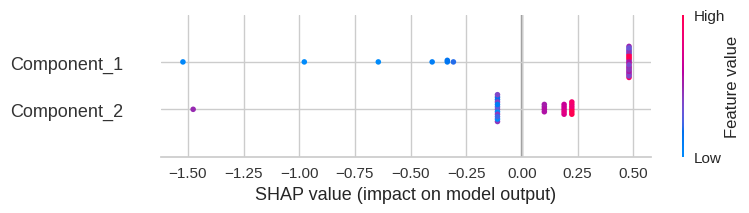

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_xgboost_pca, plot='summary')

In [ ]:
interpret_model(tuned_xgboost_pca, plot='reason', observation=27)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=27, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_xgboost_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:log

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
